# 1.3 Perceptron and XOR

![perceptron](https://princetonuniversity.github.io/NEU-PSY-502/_static/images/502B/computation/primer/perceptron.png)

##  Introduction

To first approximation, activity of a neuron in the brain is determined by the integration of excitatory and inhibitory impulses received by its dendrites and passed to the cell body. If excitatory signals outweigh inhibitory signals sufficiently to pass a threshold, the neuron will fire, sending out an action potential via its axon.  
  
Artificial neurons were conceived to behave in a similar manner to real ones. Early artificial neurons were dubbed perceptrons; they received multiple binary inputs, multiplied each one by an appropriate “weight”, added them together (this should sound familiar), and produced a single binary output that depends on whether the sum passes a certain threshold.  In short, they applied a step function to the transformed input.  This is referred to as an LBF (linear basis function) activation function.  
  
![LBF](https://princetonuniversity.github.io/NEU-PSY-502/_static/images/lbf_perceptron.jpeg)
  
If we define the threshold $ \equiv-b $, then we can rewrite our conditional output  
  
$$
\begin{equation}
 output=
\begin{cases}
 0 & if \: w \cdot x + b \leq 0
\\
1  & if \: w \cdot x + b >  0
\end{cases}
\end{equation}
$$
  
The term $b$ is called a bias, and perceptrons are a special kind of linear classifier called a binary classifier. It is known as a binary classifier because it is assigning one of two labels (the binary output) to the inputs it receives, according to their dot product with the weights (a linear operation). The line defined by $ w \cdot x+b=0 $ is the line that separates the classes from each other. Our “red square, blue circle” class example from earlier in the lab is an example of binarily classifiable data.  
  
![multilayer ffn](https://princetonuniversity.github.io/NEU-PSY-502/_static/images/multilayer_ffn.jpeg)  
  
In a multilayer feedforward network, artificial neurons are clustered into layers, where the output of one layer forms the input of the next. The first layer is known as the input layer, the last is the output layer, and the operational layers, where the dot products are computed, are called “hidden layers”.

Binary classification is simple but powerful. We will show this by using them to construct a set of logic gates.

**Installation and Setup**

In [1]:
%%capture
%pip install psyneulink

import numpy as np
import matplotlib.pyplot as plt
import psyneulink as pnl

## AND Gate

An AND gate is a logic gate that answers the question: 

“Are A and B both simultaneously true?”. 

In this context, we represent "True" with `1` and "False" with `0`.


First, let's define a *training set* that includes all possible input combinations of the boolean values True (`1`) and False (`0`) and their corresponding *labels*. Remember, AND(X, Y) is true if and only if both X and Y are true.

***Note:*** In a machine learning context, we often refer to a *training set* as a collection of input-output pairs used to teach a model. A *label* as the correct output for a given input.

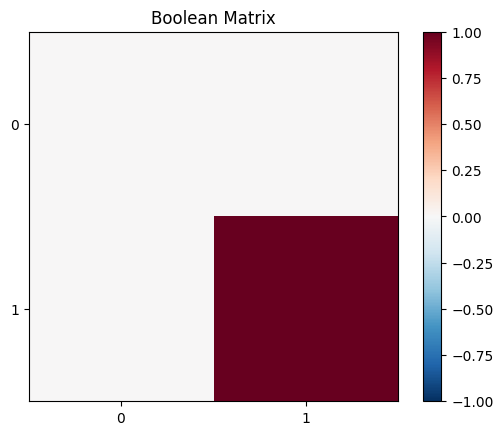

In [2]:
# Create the training set
training_set = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
training_set = training_set.T
n_combos = np.shape(training_set)[1]
ub = np.max(abs(training_set))
lb = - ub

# Create the labels
and_labels = np.array([0, 0, 0, 1])
and_labels.shape = (1, n_combos)

# 
# Reshape labeled_set to match a 2D grid
labeled_set = np.zeros((2, 2))  # 2x2 grid for (A, B) inputs
for i in range(n_combos):
    A, B = training_set[:, i]  # Extract each (A, B) pair
    labeled_set[B, A] = and_labels[0, i]  # Assign label at corresponding (B, A) position

# Plot the labeled set
plt.figure()
plt.title('Boolean Matrix')
plt.xticks(np.arange(0, n_combos))
plt.yticks(np.arange(0, 2))
plt.imshow(labeled_set, cmap='RdBu_r', vmin=lb, vmax=ub)
plt.colorbar()
plt.show()

### Using Weights in a Perceptron

Given an input vector X (e.g., the values of A and B in an AND gate), the perceptron computes a weighted sum of these inputs using a weight matrix W and then applies a bias term to adjust the threshold for activation:

$$
Z = Wx + b
$$


Z is the weighted sum before applying an activation function.
This weighted sum determines the perceptron’s output. If Z is greater than a certain threshold (often 0), the perceptron outputs 1 (True); otherwise, it outputs 0 (False).

Here, we implement a random weight matrix with a fixed bias (`b`=-1):


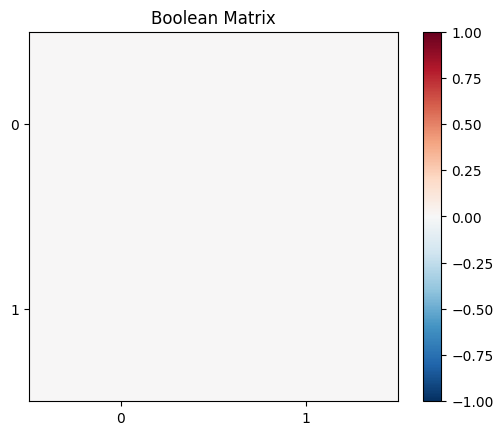

In [3]:
# Set a random seed for reproducibility
np.random.seed(16)

# Remember, the shape of the matrix is determined by its input shape (2 in this case), and its output shape (1 in this case)
w = np.random.rand(1, 2)

# Set the bias
b = -1

# define a function that calculates the output of the perceptron
def predict(x):
    # calculate the weighted sum
    z = w @ x + b
    # check weather z is above the threshold
    return int(z[0] > 0)

# Let's print the outputs of this random perceptron on the training set:
predicted_set = np.zeros((2, 2))  # 2x2 grid for (A, B) inputs
for i in range(n_combos):
    A, B = training_set[:, i]  # Extract each (A, B) pair
    predicted_set[B, A] = predict(training_set[:, i])
      # Assign label at corresponding (B, A) position


# Plot the predictions
plt.figure()
plt.title('Boolean Matrix')
plt.xticks(np.arange(0, n_combos))
plt.yticks(np.arange(0, 2))
plt.imshow(predicted_set, cmap='RdBu_r', vmin=lb, vmax=ub)
plt.colorbar()
plt.show()


<h4 style="background: #256ca2; color: #e9e9e9">🎯  Exercise 1</h4>
    

The above implementation does not give the correct answer (it is not a and gate). Can you think about an algorithm that automatically "finds" the right weights?
    


<details><summary style="background: #d6c89d; color: #e9e9e9">💡 Hint</summary>
    

You can be inspired by the [bogo sort algorithm](https://www.google.com/search?sca_esv=053903a76464d342&rlz=1C5GCCM_en&sxsrf=AHTn8zq_1Y3AoSWLlwKQhmfqMA_a_arNDA:1738512836603&q=pogo+sort&udm=7&fbs=ABzOT_CWdhQLP1FcmU5B0fn3xuWp6IcynRBrzjy_vjxR0KoDMs-NPkvpfnC0-Nvsd7HFz32b6_vVeH3Eh5LTn6vYQxgOy79dkH6TeiZNM9aLPSHRcxYTXxi8SKQDYJDO9qd6-gcAKe7AlCX8DiGxWpVr1AWEK_st4_2sOqSvy2q_T0FuN3a9CsFYiJFOmc5QD4AFJJ2g-eL4OU0xkk0cfwD6gzBQ2Mgs0g&sa=X&ved=2ahUKEwiotsCAsaWLAxWcF2IAHdigLm0QtKgLegQIGRAB&biw=1728&bih=870&dpr=2#fpstate=ive&vld=cid:9ee528e0,vid:DaPJkYo2quc,st:0). It randomly picks permutations, and tests if they are sorted.
    
</details>
    


<details><summary style='background: #22ae6a; color:#e9e9e9'>✅ Solution</summary>
    

A simple (brute force) solution is to randomly initialize the weights until we find fitting ones:

```python
predicted_set = np.zeros((2, 2))
tries = 0


def predict(x, w):
    z = w @ x + b
    return int(z[0] >= 0)


while not np.allclose(predicted_set, labeled_set):  # as long as our predictions doesn't match the labels
    tries += 1
    # get new random weights
    w = np.random.rand(1, 2)
    b = -1

    for i in range(n_combos):
        A, B = training_set[:, i]
        predicted_set[B, A] = predict(training_set[:, i], w)
        

print(f"Found fitting weights after {tries} tries:")

plt.figure()
plt.title('Boolean Matrix')
plt.xticks(np.arange(0, n_combos))
plt.yticks(np.arange(0, 2))
plt.imshow(predicted_set, cmap='RdBu_r', vmin=lb, vmax=ub)
plt.colorbar()
plt.show()
```
    
</details>
    

### Learning the Weights

For a simple gate like this, we could choose our weights and bias manually to correctly classify each example. However, we would rather the perceptron learn the weights itself. We can train it using supervised learning by showing it examples of the data with the appropriate labels (a truth table). If the weights were initialized randomly, these will generate a random answer at first, so the perceptron must change its weights when its output does not match the labels we gave it. 
  
For perceptrons, we use error-based learning, where the weights are adjusted in the correct direction, based on the size and direction of the error. This is given by the Perceptron Learning Rule, and is written mathematically as:  

$$
\begin{equation}
w_{ij} \rightarrow w_{ij}+ \eta (desired \ label - predicted \ label) in_{i}
\end{equation}
$$

Where $w_{ij}$ is the weight connecting the $i-th$ input to the $j-th$ output, $in_{i}$ is the $i{th}$ input, and $ \eta $ is the learning rate. The learning rate is a positive parameter that determines the size of the weight update.

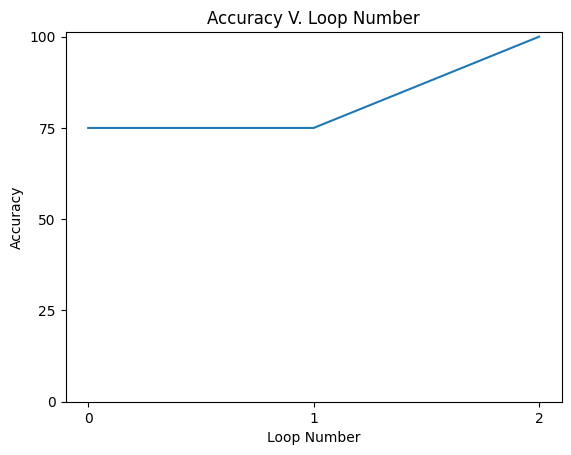

In [4]:
# Set a random seed for reproducibility
np.random.seed(42)

# Initializing the weights with random values.
w = np.random.rand(1, 2) * .1

# Set the bias and learning rate
b = -1
eta = np.array([.3, .3])

# Variables to store the accuracy and loop count
accuracy = 0
loop_count = 0
acc_vec = []

while accuracy < 100:
    summed_accuracy = 0
    # Calculate the predicted value for each input and learn the weights 
    for i in range(np.shape(training_set)[1]):
        # Set the predicted label to 0 if the predicted value is less than or equal to 0 
        # and 1 otherwise
        if w @ training_set[:, i] + b <= 0:
            predicted_label = 0
        else:
            predicted_label = 1
        # Check if the predicted label is correct
        if predicted_label == and_labels[:, i]:
            # Summing the accuracy
            summed_accuracy = summed_accuracy + 100
        else:
            diff = (and_labels[:, i] - predicted_label)
            # Update the weights if the predicted label is incorrect
            w = w + eta * diff * training_set[:, i].T
    accuracy = int(summed_accuracy / n_combos)
    acc_vec = np.append(acc_vec, accuracy)
    loop_count = loop_count + 1
lc = loop_count

# Plot the accuracy over time
plt.figure()
plt.plot(acc_vec)
plt.title('Accuracy V. Loop Number')
plt.xlabel('Loop Number')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, int(lc)))
plt.yticks([0, 25, 50, 75, 100])
plt.show()


<h4 style="background: #256ca2; color: #e9e9e9">🎯  Exercise 1</h4>
    

Implement the OR gate using the perceptron learning rule. The OR gate is a logic gate that answers the question, “is A or B true?”. Remember, OR(X, Y) is true if either X or Y (or both) are true.
    

In [5]:
# Implement your code here


<details><summary style='background: #22ae6a; color:#e9e9e9'>✅ Solution 1</summary>
    

```python
# We can use the same input_set but use different labels
or_labels = np.array([0, 1, 1, 1])
or_labels.shape = (1, n_combos)

# Set a random seed for reproducibility
np.random.seed(42)

# Initializing the weights with random values.
w = np.random.rand(1, 2) * .1


# Set the bia and learning rate
b = -1
eta = np.array([.3, .3])

# Variables to store the accuracy and loop count
accuracy = 0
loop_count = 0
acc_vec = []

while accuracy < 100:
    summed_accuracy = 0
    # Calculate the predicted value for each input and learn the weights 
    for i in range(np.shape(input_set)[1]):
        # Set the predicted label to 0 if the predicted value is less than or equal to 0 
        # and 1 otherwise
        if w @ input_set[:, i] + b <= 0:
            predicted_label = 0
        else:
            predicted_label = 1
        # Check if the predicted label is correct
        if predicted_label == or_labels[:, i]:
            # Summing the accuracy
            summed_accuracy = summed_accuracy + 100
        else:
            diff = (or_labels[:, i] - predicted_label)
            # Update the weights if the predicted label is incorrect
            w = w + eta * diff * input_set[:, i].T
    accuracy = int(summed_accuracy / n_combos)
    acc_vec = np.append(acc_vec, accuracy)
    loop_count = loop_count + 1
lc = loop_count

# Plot the accuracy over time
plt.figure()
plt.plot(acc_vec)
plt.title('Accuracy V. Loop Number')
plt.xlabel('Loop Number')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, int(lc)))
plt.yticks([0, 25, 50, 75, 100])
plt.show()
```
    
</details>
    

This method works well for a single layer of perceptrons. Now, consider multiple layers of perceptrons, each operating linearly, but producing a step function output. When they produce an incorrect result, how do we know which layer is responsible for the mistake and what step size would be useful to correct it?
  
Because of their binary output, linearly updating weights of perceptrons in a multilayer network produces unpredictable and problematic results. A natural solution is to replace the step function with a function that more gradually interpolates between 0 and 1. A good choice here is the [logistic function](https://princetonuniversity.github.io/NEU-PSY-502/content/Primers/notebooks/2%20Logistic%20Function.ipynb), which we have encountered in the previous section. It is possible to generalize the Perceptron Learning Rule to this case using calculus; the details are presented in the Appendix at the end of this notebook. We suggest that you skim the Appendix now, and then read it more carefully after you have finished this lab. Once you understand this derivation, you will be in good shape for when we discuss the Backpropagation algorithm in the next lab.

##  Two Layer Network in PsyNeuLink

It is reasonably straightforward to create a two layer logistic network in numpy. However, doing so in PNL is almost trivial. Here, we implement both the AND, and the OR gate in psyneulink. In addition, we also implement the XOR gate. Remember, XOR(X, Y) is true if X or Y is true, but not both. 

***Note:***, a XOR gate is not linearly separable, so a single layer perceptron cannot learn it. However, a two-layer network can learn it.

/opt/hostedtoolcache/Python/3.11.11/x64/lib/python3.11/site-packages/psyneulink/library/compositions/autodiffcomposition.py:1436: UserWarning: The execution_mode argument was not specified in the learn() method of 'autodiff_composition'; ExecutionMode.PyTorch will be used by default.
  warnings.warn(f"The execution_mode argument was not specified in the learn() method of '{self.name}'; "


The last loss was  [0.00134469]


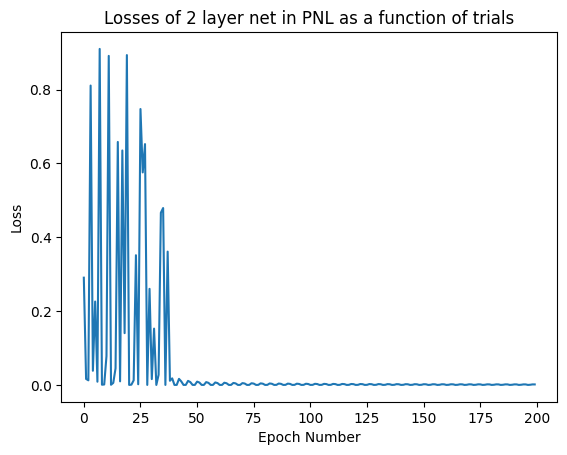

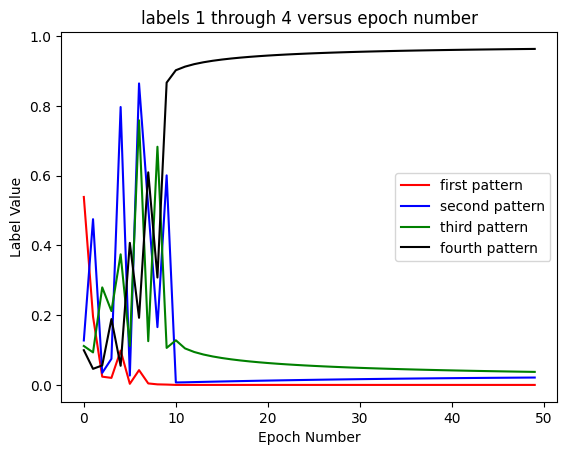

In [6]:
trials = 10_000
# To give the network extra flexibility, we include an extra dimension in the input whose value is always equal to 1
# this effectively allows the network to learn a bias term

input_set_pnl = [[0, 0, 1], [0, 1, 1], [1, 0, 1], [1, 1, 1]]
input_length = np.shape(input_set_pnl)[1]
n_combos_pnl = np.shape(input_set_pnl)[0]

# Note, PNL is capable of training biases, but to keep this tutorial simple using the method we will be incorporating for the
# following exercises, the biases implemented by PNL would not be trained.
# To resolve that issue, we implement the bias as an extra input, and train it as we would any other weight.

and_labels_pnl = [[0], [0], [0], [1]]
or_labels_pnl = [[0], [1], [1], [1]]
xor_labels_pnl = [[0], [1], [1], [0]]

# Specify which label set you would like to use.
labels_pnl = and_labels_pnl  # Change this to OR_labels_pnl or XOR_labels_pnl to see the network learn the OR or XOR gate

# Creating a 2 layer net in PNL:
# First, we create the input layer. This layer is simply a Transfer Mechanism that brings the examples into the network
# We do not have to specify a function (it defaults to linear, slope = 1, intercept = 0), 
# but we do need to specify the size, which will be the size of our input array.
in_layer = pnl.TransferMechanism(input_shapes=input_length, function=pnl.Linear)

# Next, we specify the output layer. This is where we do our logistic transformation by applying the Logistic function.
# The size we specify for this layer is the number of output. In this case, we only have one output.
out_layer = pnl.TransferMechanism(input_shapes=1, function=pnl.Logistic)

# Finally, we create a projection mapping from input to output. We will initialize with random weights.
weights = pnl.MappingProjection(name='in_to_out',
                                matrix=np.random.rand(input_length, 1),
                                sender=in_layer,
                                receiver=out_layer)

# The, we will put them together into an Autodiff Composition. These compositions are a faster option
# for backpropagation learning that integrate PNL and pytorch.
logic_two_layer = pnl.AutodiffComposition(
    learning_rate=10,
)

# We will now add our layers and projection map into our composition
logic_two_layer.add_node(in_layer)
logic_two_layer.add_node(out_layer)

# Here, we set the log conditions for the output layer. This will allow us to see the output of the network as it trains.
out_layer.log.set_log_conditions(pnl.VALUE)

# We add the projection to the composition
logic_two_layer.add_projection(sender=in_layer, projection=weights, receiver=out_layer)

# To learn our desired gates, we train the autodiff composition by giving it an input dictionary and running it
input_dict = {"inputs": {in_layer: input_set_pnl}, "targets": {out_layer: labels_pnl}, "epochs": 50}
result = logic_two_layer.learn(inputs=input_dict)

# Here, we acquire a log of the losses over time so we can see how our network learned
#This portion acquires and plots the losses
exec_id = logic_two_layer.default_execution_id
losses = logic_two_layer.parameters.torch_losses.get(exec_id)

print("The last loss was ", losses[-1])

plt.plot(losses)
plt.title('Losses of 2 layer net in PNL as a function of trials')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.show()

#This portion acquires and plots the labels

# The logged values of the output layer that were recorded during the training
data = out_layer.log.nparray()[1][1][-1][1:]

# Psyneulink stores the logged values as a list of length 200 (50 epochs x 4 inputs per epoch)
# We will reshape this list into an array of shape 50 x 4, so that each column represents one of the training patterns
# and each row represents one training epoch
length = np.shape(data)[0]
rat = int(length / n_combos_pnl)

data = np.reshape(data, (rat, n_combos_pnl))
data = np.matrix(data)
labs_1 = np.array(data[:, 0])
labs_2 = np.array(data[:, 1])
labs_3 = np.array(data[:, 2])
labs_4 = np.array(data[:, 3])

plt.plot(labs_1, label='first pattern', color='red')
plt.plot(labs_2, label='second pattern', color='blue')
plt.plot(labs_3, label='third pattern', color='green')
plt.plot(labs_4, label='fourth pattern', color='black')
plt.legend()

plt.title('labels 1 through 4 versus epoch number')
plt.xlabel('Epoch Number')
plt.ylabel('Label Value')
plt.show()



Explore the effectiveness of this 2 layer network by running it at different learning rates, for different numbers of trials, and on different label sets. 

Which sets does it learn effectively? Which sets doesn't it?


<h3 style="background: #256ca2; color: #e9e9e9">🎯  Exercise 2</h3>
    

Try the running the two layer network on the XOR gate. You will observe that the network is not able to learn the XOR gate. Why do you think this is the case?

Hint: Consider the following graph that shows the values of the XOR gate for different inputs:
    

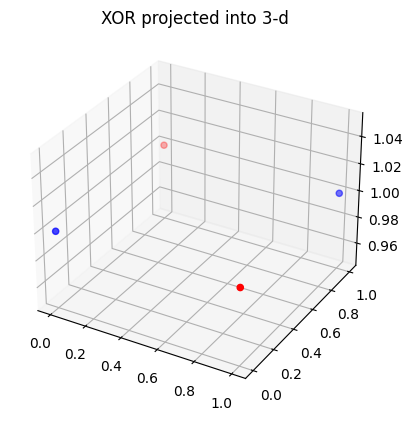

In [7]:
# Convert to numpy arrays, as required for plotting functions
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# We will plot each point as red if the XOR relation is satisfied, and blue if not 
xor_colors = ['blue', 'red', 'red', 'blue']
ax = plt.axes(projection='3d')

ax.scatter(x[:, 0], x[:, 1], [1, 1, 1, 1], c=xor_colors)
plt.title('XOR projected into 3-d')
plt.show()


<details><summary style='background: #22ae6a; color:#e9e9e9'>✅ Solution 2</summary>
    

The important difference between the XOR compared to AND, and OR is that XOR is not *linearly separable*, while the other two are. This means that in the graph above, that it is not possible to draw a straight line such that 

1.   Both red points are on the same side of the line
2.   Both blue points are on the same side of the line
3.   The red points are on the opposite side as the blue points. 

In 2 dimensions, this is clearer. Try running the following code to see the XOR gate in 2 dimensions (copy it into a code cell) and create a random line. You can convince yourself that no matter which line is chosen, at least one of the three conditions above will be violated.

```python
#the third dimension is equal to 1 for all four points, so it makes no difference to ignore it
plt.scatter(x[:,0],x[:,1],c=xor_colors)

#randomly generate and plot a line 
y_intercept=np.random.uniform(low=-2,high=2)
x_intercept=np.random.uniform(low=-2,high=2)

slope=-y_intercept/x_intercept
plt.plot([0,1],[y_intercept,y_intercept+slope])
```

In contrast, for the AND gate, a line that separates the blue and red dots exists:

```python
and_colors=['blue','blue','blue','red']


plt.scatter(x[:,0],x[:,1],c=and_colors)

y_intercept=1.5
x_intercept=1.5

slope=-y_intercept/x_intercept
plt.plot([0,1],[y_intercept,y_intercept+slope])
```

***Optional:*** Convince yourself that the OR gate is also linearly separable by plotting it in 2 dimensions.

Now, why is linear separability important here? On the one hand, our network is defined so that when it is given an input $x$, it produces an output of $1$ if $w\cdot x+b>0$ and an output of 0 otherwise. It will be able to learn effectively provided that there exist some $w$ and $b$ such that $w\cdot x+b>0$ whenever $x$ is red and $<0$ whenever $x$ is blue (since we want the output to be positive whenever $x$ is red and negative when blue).
 
  On the other hand, consider a line with a y-intercept of $y_0$ and a slope of $m$. Then a point $(a,b)$ lies above this line if $b>ma+y_0$ and lies below the line otherwise. We can rearrange this condition to read $(-m,1)\cdot (a,b) -y_0>0$ which is the same as the first equation,  provided we take $w=(-m,1)$, $b=-y_0$, and $x=(a,b)$. This means that our original condition $w\cdot x+b>0$ is equivalent to checking whether $x$ is above or below some line (with the parameters of the line being determined by $w$ and $b$, and vice versa). So in order for our network to learn effectively, it must be the case that all the red points are above some line, and all the blue points are below that same line, i.e. the points must be linearly separable. Since XOR does not satisfy this condition, our network cannot learn the labeling in this case. 
    
</details>
    

## Appendix: Derivation of Learning Rule for two-layer network with sigmoidal activation

Sigmoid neurons take inputs and produce outputs similar to perceptrons, however, the inputs and outputs are not binary. Additionally, rather than applying a simple dot product to the inputs such that

$$
\begin{equation}
z(w,x) = w \cdot x + b
\end{equation}
$$

these new types of neurons apply the sigmoid function, of the form

$$
\begin{equation}
\sigma(z(w,x))=\frac{1}{1+e^{-z(w,x)}}
\end{equation}
$$

This function is actually the same as a logistic function with a bias value of 0 and a gain value of 1. It has an upper bound at 1 and a lower bound at zero. This can be seen by examining the limits: $\lim_{z(w,x)\to\infty} \sigma(z(w,x))$ and $\lim_{z(w,x)\to -\infty} \sigma(z(w,x))$. Although its equation looks complex, a logistic function can quickly become intuitive when you try modifying the parameters, as shown in [logistic function](https://princetonuniversity.github.io/NEU-PSY-502/content/Primers/notebooks/2%20Logistic%20Function.ipynb).

In a multilayer network, the output of multiple sigmoid functions in the first non-input layer forms the input to the next layer. However, because of its bounded structure, a sigmoid function only outputs 1 or 0 at the limits (when rounding error kicks in). Typically its output will be somewhere in between. Therefore, there will always be some error between the desired output of a logical function (1 or 0) and the output of a sigmoid. The error of a single output is given by  

$$
\begin{equation}
E=desired \ output - \sigma(z(w,x))
\end{equation}
$$
  
A common measure of error is called the mean squared error, and is given by  

$$
\begin{equation}
E =
\frac{1}{n} \ \sum_{i=1}^{n} (desired \ output_{i} - \sigma(z(w,x))_{i})^2
\end{equation}
$$ 
  
Although we cannot drive this value to zero (when our desired output is binary), we can minimize it. Because it is a sum of squares, we can minimize it by minimizing each term. Because each term is a convex function of the weights, it is minimized when its derivative as a function of the weights is zero. We can train our neural net to do this using the delta rule, which is very similar to the perceptron learning rule. 

$$
\begin{equation}
w^{t+1} = \underbrace{w^t}_\text{current weight} + \underbrace{\Delta w^t}_\text{weight change}
\end{equation}
$$

where 

$$
\begin{equation}
\Delta w^t = - \alpha \underbrace{\frac{\partial E^t}{\partial w^t}}_\text{change in error terms as a function of the weights}
\end{equation}
$$
  
As you can see, when the derivative of the error is zero, the weights stop changing. The error is, at this point, minimized.  
  
In order to calculate the derviative of the error, we simply employ the chain rule. We will aslo be using a modified form of the error. Instead of scaling each term by $\frac{1}{n}$, we will scale by $\frac{1}{2}$ 

So, each error term is given by 
 
$$
\begin{equation}
E_{i} =
\frac{1}{2} (desired \ output_{i} - \sigma(h(x))_{i})^2
\end{equation} 
$$
  
and its derivative is given by  
 
$$
\begin{equation}
\frac{\partial E_{i}}{\partial w} = \underbrace{\frac{\partial E_{i}}{\partial \sigma(h(w,x))}}_\text{derivative 1} \quad
\underbrace{\frac{\partial \sigma(h(w,x))}{\partial h(w,x)}}_\text{derivative 2} \quad
\underbrace{\frac{\partial h(w,x)}{\partial w}}_\text{derivative 3}
\end{equation}
$$
  
Now, because $h(w,x)$ is a vector equation, its derivative is also a vector. This produces our vector of weight changes, each term of which is determined by derivative 3  

$$
\begin{equation}
\quad
\underbrace{\frac{\partial h(w,x)}{\partial w_{i}}}_\text{derivative 3}
\end{equation}  
$$

This comes out surprisingly tidily:  

$$
\begin{equation}
{\frac{\partial E^t}{\partial w_{i}^t}}=(desired \ output - \sigma) (\sigma (1 - \sigma))x_{i}
\end{equation}
$$
  
Now

$$
\begin{equation}
\Delta w^t_{i} = - \alpha (desired \ output - \sigma) (\sigma (1 - \sigma))x_{i}
\end{equation}
$$
  
Biases are updated in much the same fashion, using

$$
\begin{equation}
\Delta b^t_{i} = - \alpha (desired \ output - \sigma) (\sigma (1 - \sigma))1
\end{equation}
$$


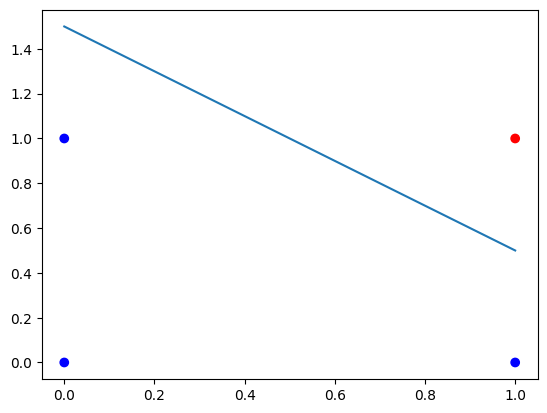

In [8]:
and_colors=['blue','blue','blue','red']


plt.scatter(x[:,0],x[:,1],c=and_colors)

y_intercept=1.5
x_intercept=1.5

slope=-y_intercept/x_intercept
plt.plot([0,1],[y_intercept,y_intercept+slope])